In [1]:
# To make data visualisations display in Jupyter Notebooks 
import numpy as np     # For linear algebra
import pandas as pd     # For Data processing, Input & Output load
import seaborn as sns   # For statistical graphs and visualization
import matplotlib.pyplot as plt  # For Visualization & plotting
%matplotlib inline
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Product purchase data.csv')

In [3]:
dataset.shape

(400, 3)

In [4]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
#^O/P=Out of 400 people 257 did not purchased the product & 143 purchased the product

In [6]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#^Here we can easily see the data as we only have 2 independent varibles,when there are more than 2 independent variables it
#becomes a problem & we have to imagine

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

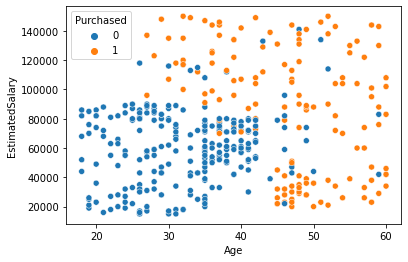

In [7]:
sns.scatterplot('Age','EstimatedSalary',hue='Purchased',data=dataset)

In [ ]:
#^O/P= We want to divide the data based on 'Purchaed' value so  those who have age less than 40 years and salary 
# is less than 80k those people haven't purchased the product.

In [8]:
X = dataset.drop(columns='Purchased')
Y = dataset['Purchased']

In [ ]:
#^after dropping 'purchase' whatever left would be X

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,random_state=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=1)

In [11]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
#^O/P=All these are Hyperparameters

In [12]:
Y_pred = classifier.predict(X_test)

In [13]:
Y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [ ]:
#^O/P= Predictions on the basis of split 

In [14]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))


Train data performance
1.0


In [ ]:
#Let's see the tree

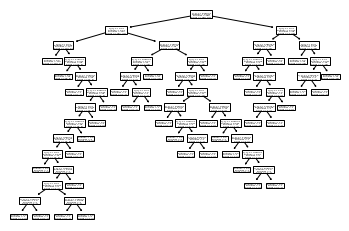

In [15]:
from sklearn import tree     #it is overfitting as the train data cant be 1 based on Age & salary it is showing so much trees
tree.plot_tree(classifier);

# let's  do some prepruning 

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=1)

In [17]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [18]:
Y_pred = classifier.predict(X_test)

In [19]:
Y_pred 

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [20]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))


Train data performance
0.95


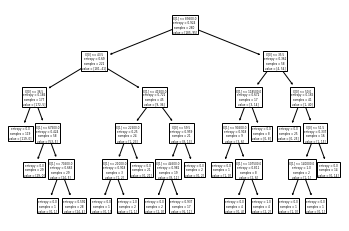

In [21]:
from sklearn import tree     #it is overfitting based on Age & salary it is showing so much trees
tree.plot_tree(classifier);

In [ ]:
#for diff. max_depths

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=1)

In [23]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [24]:
Y_pred = classifier.predict(X_test)

In [25]:
Y_pred 

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [26]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))


Train data performance
0.94


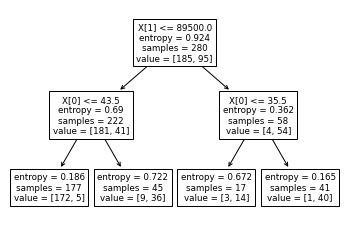

In [27]:
from sklearn import tree     
tree.plot_tree(classifier);

In [ ]:
#^Now the tree is visible,as we are increasing the max_depth, accuracy is also increasing but only of test but ideally we need 
#accuracy for both train & test data.

In [28]:
X_train.shape

(280, 2)

In [29]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

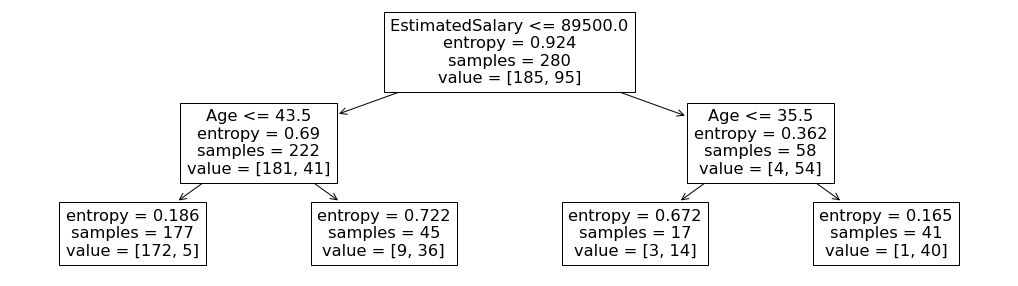

In [30]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [31]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.94

Test data performance
0.86


In [ ]:
#^ We are not getting the desrirable output from max_depth so let's check by taking  max_leaf_node

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=3,random_state=1)

In [33]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=1)

In [34]:
X_train.shape

(280, 2)

In [35]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

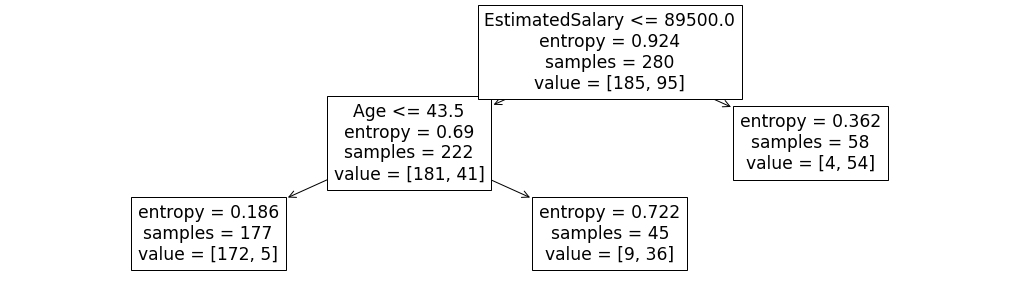

In [36]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [37]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.94

Test data performance
0.86


In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5,random_state=1)

In [39]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=1)

In [40]:
X_train.shape

(280, 2)

In [41]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

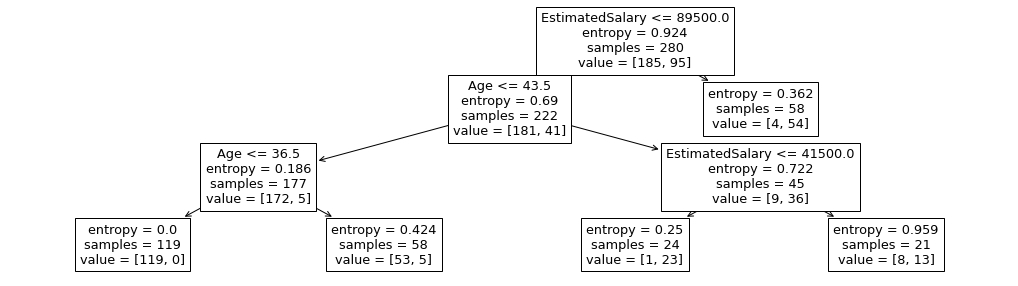

In [42]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [43]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.94

Test data performance
0.86


In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=25,random_state=1)

In [45]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25, random_state=1)

In [46]:
X_train.shape

(280, 2)

In [47]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

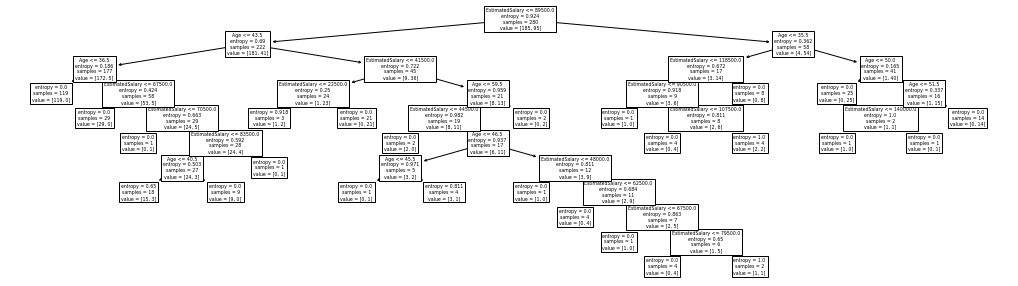

In [48]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [49]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.97

Test data performance
0.83


# Gini criterion 

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=3,random_state=1)

In [51]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1)

In [52]:
X_train.shape

(280, 2)

In [53]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

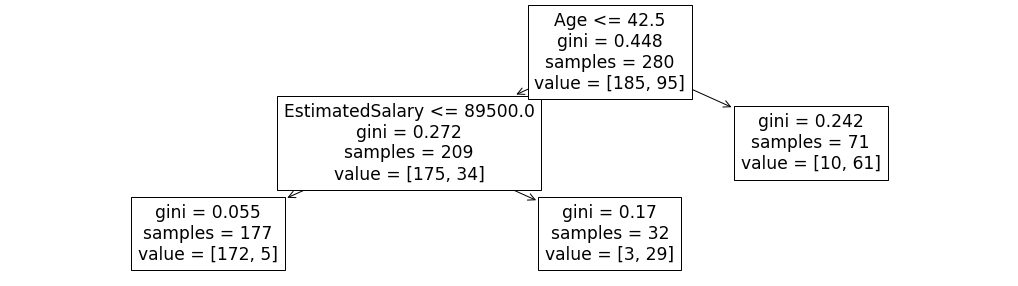

In [54]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [55]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.94

Test data performance
0.86


In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5,random_state=1)

In [57]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=1)

In [58]:
X_train.shape

(280, 2)

In [59]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

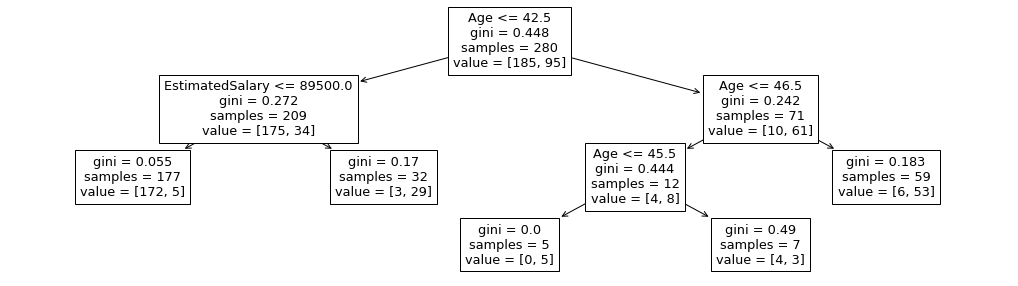

In [60]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [61]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.94

Test data performance
0.83


In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=25,random_state=1)

In [63]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=25, random_state=1)

In [64]:
X_train.shape

(280, 2)

In [65]:
Y_train.value_counts()

0    185
1     95
Name: Purchased, dtype: int64

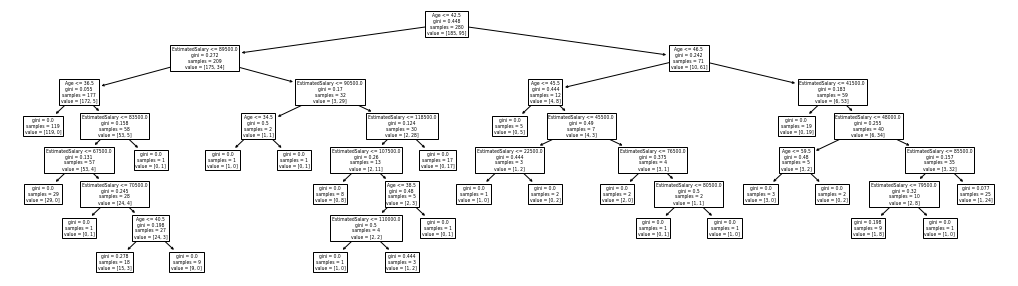

In [66]:
from sklearn import tree
plt.figure(figsize=(18,5))
tree.plot_tree(classifier, feature_names=X_train.columns.values);

In [67]:
Y_pred_train = classifier.predict(X_train)
print("Train data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_train,Y_pred_train))
print(accuracy_score(Y_train,Y_pred_train).round(2))

print()
Y_pred_test = classifier.predict(X_test)
print("Test data performance")
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_test))
print(accuracy_score(Y_test,Y_pred_test).round(2))

Train data performance
0.98

Test data performance
0.83
